<h2>DENGAI: PREDICTING DISEASE SPREAD - BENCHMARK</h2>

Using environmental data collected by various U.S. Federal Government agencies—from the Centers for Disease Control and Prevention to the National Oceanic and Atmospheric Administration in the U.S. Department of Commerce— to predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru. This chalenge is part of a DrivenData competition: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/.

The goal is to predict the number of dengue cases each week (in each location) based on environmental variables that describe changes in temperature, precipitation, vegetation, and more.

The dataset has the following information about San Juan and Iquitos:

<ul>
    <li><font color=blue>city</font> – City abbreviations: <font color=red>sj</font> for San Juan and <font color=red>iq</font> for Iquitos</li>
    <li><font color=blue>year</font> – Year</li>
    <li><font color=blue>weekofyear</font> – Week number from the specific year</li>
    <li><font color=blue>week_start_date</font> – Date given in yyyy-mm-dd format</li>
    <h4>NOAA's GHCN daily climate data weather station measurements</h4>
    <li><font color=blue>station_max_temp_c</font> – Maximum temperature</li>
    <li><font color=blue>station_min_temp_c</font> – Minimum temperature</li>
    <li><font color=blue>station_avg_temp_c</font> – Average temperature</li>
    <li><font color=blue>station_precip_mm</font> – Total precipitation</li>
    <li><font color=blue>station_diur_temp_rng_c</font> – Diurnal temperature range</li>
    <h4>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</h4>
    <li><font color=blue>precipitation_amt_mm</font> – Total precipitation</li>
    <h4>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</h4>
    <li><font color=blue>reanalysis_sat_precip_amt_mm</font> – Total precipitation</li>
    <li><font color=blue>reanalysis_dew_point_temp_k</font> – Mean dew point temperature</li>
    <li><font color=blue>reanalysis_air_temp_k</font> – Mean air temperature</li>
    <li><font color=blue>reanalysis_relative_humidity_percent</font> – Mean relative humidity</li>
    <li><font color=blue>reanalysis_specific_humidity_g_per_kg</font> – Mean specific humidity</li>
    <li><font color=blue>reanalysis_precip_amt_kg_per_m2</font> – Total precipitation</li>
    <li><font color=blue>reanalysis_max_air_temp_k</font> – Maximum air temperature</li>
    <li><font color=blue>reanalysis_min_air_temp_k</font> – Minimum air temperature</li>
    <li><font color=blue>reanalysis_avg_temp_k</font> – Average air temperature</li>
    <li><font color=blue>reanalysis_tdtr_k</font> – Diurnal temperature range</li>
    <h4>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</h4>
    <li><font color=blue>ndvi_se</font> – Pixel southeast of city centroid</li>
    <li><font color=blue>ndvi_sw</font> – Pixel southwest of city centroid</li>
    <li><font color=blue>ndvi_ne</font> – Pixel northeast of city centroid</li>
    <li><font color=blue>ndvi_nw</font> – Pixel northwest of city centroid</li> 
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import os

data_path = 'D:\Documents\Google Drive\Competicoes\DrivenData\DengueAI'
train_data_file = os.path.join(data_path,'dengue_features_train.csv')
test_data_file = os.path.join(data_path,'dengue_features_test.csv')
labels_file = os.path.join(data_path,'dengue_labels_train.csv')

#using city, year and weekofyear as index
train_set = pd.read_csv(train_data_file, index_col=[0,1,2])
test_set = pd.read_csv(test_data_file, index_col=[0,1,2])
label_set = pd.read_csv(labels_file, index_col=[0,1,2])

train_set.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, ('sj', 1990, 18) to ('iq', 2010, 25)
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        1456 non-null   object 
 1   ndvi_ne                                1262 non-null   float64
 2   ndvi_nw                                1404 non-null   float64
 3   ndvi_se                                1434 non-null   float64
 4   ndvi_sw                                1434 non-null   float64
 5   precipitation_amt_mm                   1443 non-null   float64
 6   reanalysis_air_temp_k                  1446 non-null   float64
 7   reanalysis_avg_temp_k                  1446 non-null   float64
 8   reanalysis_dew_point_temp_k            1446 non-null   float64
 9   reanalysis_max_air_temp_k              1446 non-null   float64
 10  reanalysis_min_air_temp_k              1446 n

There are missing values in almost all columns in dataset, but <font color=blue>ndvi_ne</font> is the one with the most amount of missing values.

As each city has its particularities, they must be modeled separately.

Text(0.5, 0, 'Time')

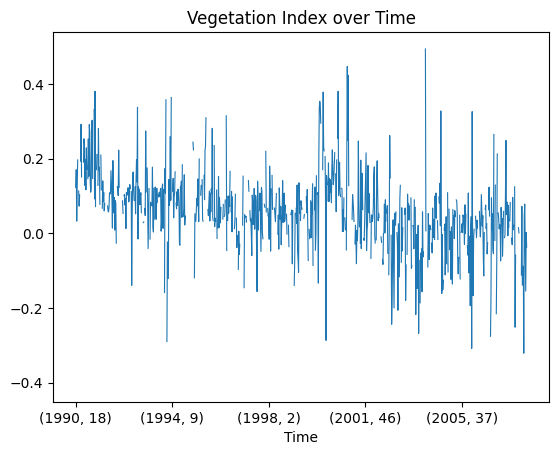

In [3]:
sj_train_set = train_set.loc['sj'].copy()
iq_train_set = train_set.loc['iq'].copy()

sj_train_set.ndvi_ne.plot.line(lw=0.8)

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Fill the NaN values in the series using linear interpolation.

Text(0.5, 0, 'Time')

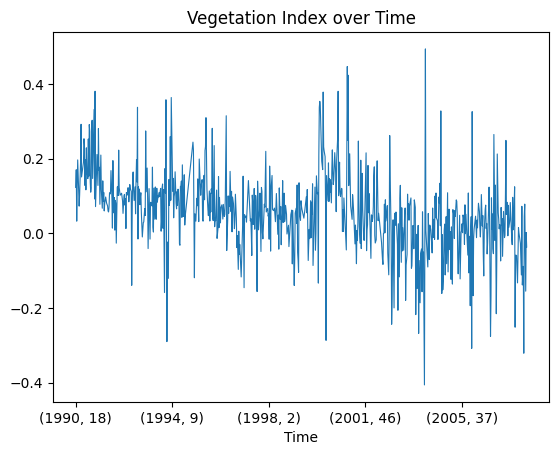

In [4]:
def fill_nan_values(data):#data=series of dataframe[column]
    aux = data.isna().values
    X = data.values
    i=0
    while(i<len(data)):
        while (aux[i]==False):
            i+=1
            if i>=len(data):
                break
        j=i
        while (i<len(data))and aux[i]:
            i+=1
        if i>=len(data):
                break
        n=i-j
        inc = (X[i]-X[j-1])/(i-j+1)
        while j<i:
            X[j] = X[j-1]+ inc
            j+=1
    return X

for col in train_set.columns:
    sj_train_set[col] = fill_nan_values(sj_train_set[col])
    iq_train_set[col] = fill_nan_values(iq_train_set[col])

sj_train_set.ndvi_ne.plot.line(lw=0.8)

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Analysing some precipitation variables to see whether any of them can be dropped.

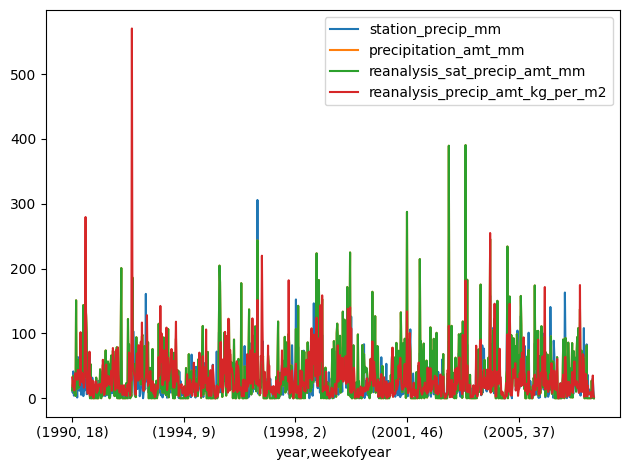

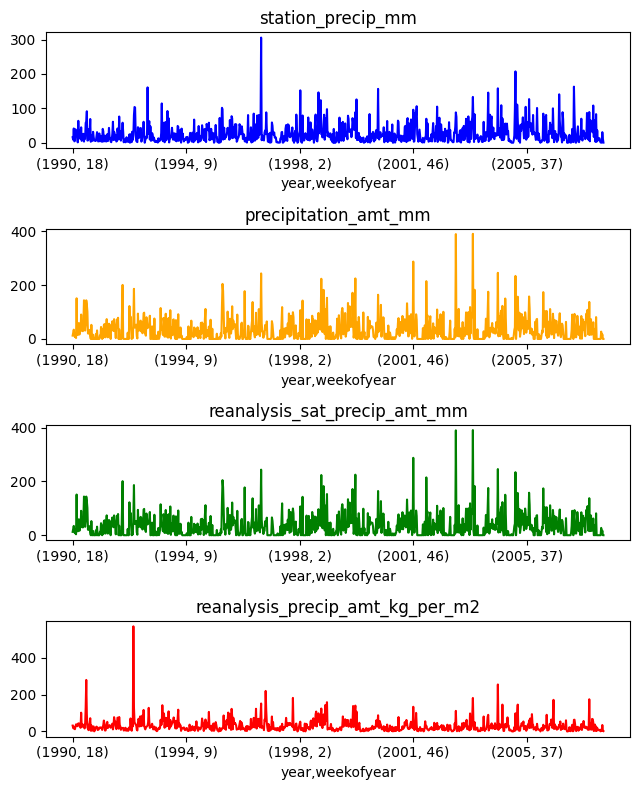

In [5]:
#precipitation variables
precip_vals = ['station_precip_mm','precipitation_amt_mm','reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2']
fig,ax = plt.subplots()
sj_train_set[precip_vals].plot(ax=ax)
fig.tight_layout()
plt.show()

colors=['blue','orange','green','red']
fig,ax = plt.subplots(4,1, figsize=(6.5,8))
for col,ax,color in zip(precip_vals,ax,colors):
    sj_train_set[col].plot(ax=ax, color=color)
    ax.set_title(col)
fig.tight_layout()
plt.show()

In [6]:
print(sum(sj_train_set['precipitation_amt_mm']-sj_train_set['reanalysis_sat_precip_amt_mm']))
print(sum(iq_train_set['precipitation_amt_mm']-iq_train_set['reanalysis_sat_precip_amt_mm']))
sj_train_set.drop(columns=['reanalysis_sat_precip_amt_mm'], inplace=True)
iq_train_set.drop(columns=['reanalysis_sat_precip_amt_mm'], inplace=True)

0.0
0.0


These two columns: <font color=blue>precipitation_amt_mm, reanalysis_sat_precip_amt_mm</font> are completely the same. So, one can be dropped.
There is no need to use the same temperature variables, like max, min or avg temperature, from NOAA's GHCN daily climate data weather station measurements and NOAA's NCEP Climate Forecast System Reanalysis measurements, even with a small difference between them. Thus, instead of using reanalysis data from forecast system, only the daily climate station measurements will be used.

In [7]:
#temperature variables
temp_vals_k = ['reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']

sj_train_set.drop(columns=temp_vals_k, inplace=True)
iq_train_set.drop(columns=temp_vals_k, inplace=True)

sj_train_set.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
year weekofyear                                                           
1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
     19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
     20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
     21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
     22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                 precipitation_amt_mm  reanalysis_air_temp_k  \
year weekofyear                                                
1990 18                         12.42             297.572857   
     19                         22.82             298.211429   
     20                         34.54             298.781429   
     21                         15.36             298.987143   
     22                          7.52             299.518571   

                 reanalysis_dew_point_temp_k  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                                 
1990 18                           292.414286                            32.00   
     19                           293.951429                            17.94   
     20                           295.434286                            26.10   
     21                           295.310000                            13.90   
     22                           295.821429                            12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_specific_humidity_g_per_kg  station_avg_temp_c  \
year weekofyear                                                              
1990 18                                      14.012857           25.442857   
     19                                      15.372857           26.714286   
     20                                      16.848571           26.714286   
     21                                      16.672857           27.471429   
     22                                      17.210000           28.942857   

                 station_diur_temp_rng_c  station_max_temp_c  \
year weekofyear                                                
1990 18                         6.900000                29.4   
     19                         6.371429                31.7   
     20                         6.485714                32.2   
     21                         6.771429                33.3   
     22                         9.371429                35.0   

                 station_min_temp_c  station_precip_mm  
year weekofyear                                         
1990 18                        20.0               16.0  
     19                        22.2                8.6  
     20                        22.8               41.4  
     21                        23.3                4.0  
     22                        23.9                5.8

Building the preprocessing function to be used with other data like test dataset, considering columns to be dropped and filling in missing values.

In [8]:
def preprocessing_function(data):
    sj_data = data.loc['sj'].copy()
    iq_data = data.loc['iq'].copy()
    #variables to be dropped
    drop_vals = ['reanalysis_sat_precip_amt_mm','reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_tdtr_k']
    sj_data.drop(columns=drop_vals, inplace=True)
    iq_data.drop(columns=drop_vals, inplace=True)
    #fill nan elements
    for col in sj_data.columns:
        sj_data[col] = fill_nan_values(sj_data[col])
        iq_data[col] = fill_nan_values(iq_data[col])
    return sj_data, iq_data

<h2>Target Variable</h2>

The target variable from each city has its own distribution.

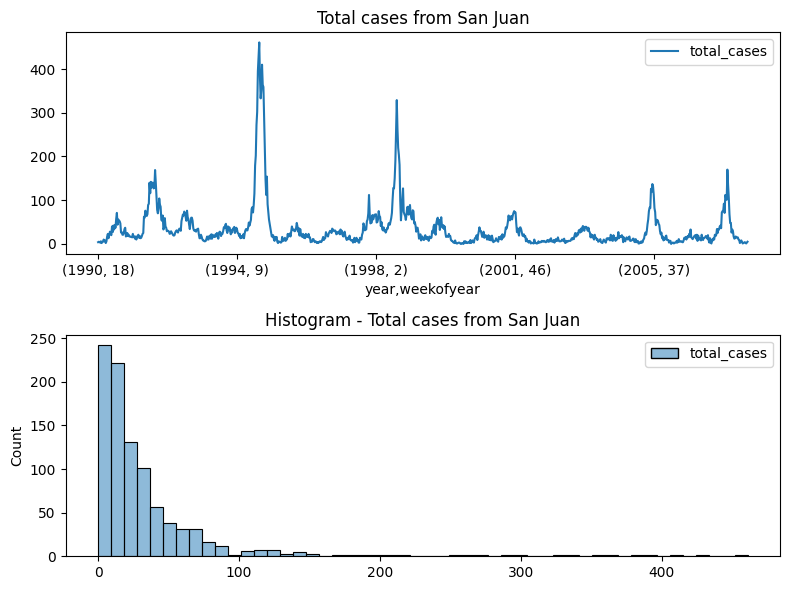

Statistics from San Juan data
       total_cases
count   936.000000
mean     34.180556
std      51.381372
min       0.000000
25%       9.000000
50%      19.000000
75%      37.000000
max     461.000000


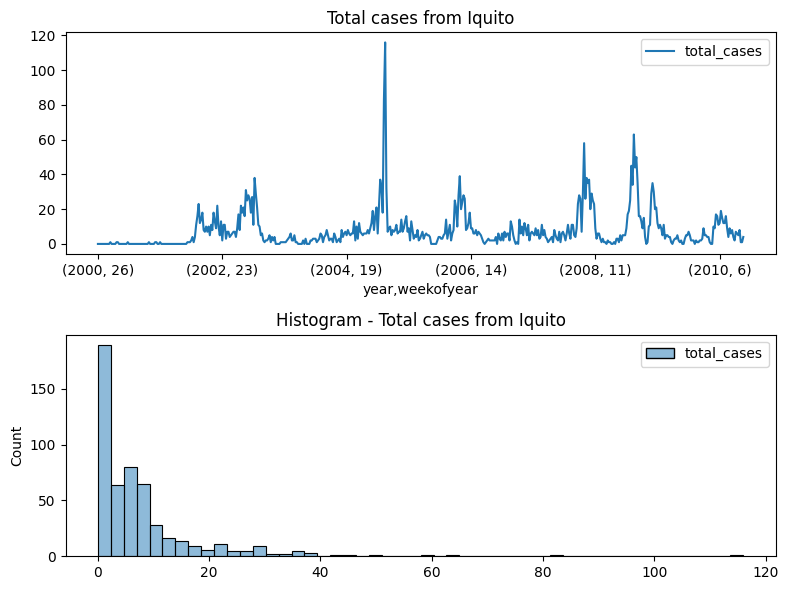

Statistics from Iquito
       total_cases
count   520.000000
mean      7.565385
std      10.765478
min       0.000000
25%       1.000000
50%       5.000000
75%       9.000000
max     116.000000


In [9]:
sj_label_set = label_set.loc['sj']
iq_label_set = label_set.loc['iq']

fig,ax = plt.subplots(2,1, figsize=(8,6))
sj_label_set.plot(ax=ax[0])
sns.histplot(data=sj_label_set, ax=ax[1], bins=50)
ax[0].set_title('Total cases from San Juan')
ax[1].set_title('Histogram - Total cases from San Juan')
fig.tight_layout()
plt.show()

print('Statistics from San Juan data')
print(sj_label_set.describe())

fig,ax = plt.subplots(2,1, figsize=(8,6))
iq_label_set.plot(ax=ax[0])
sns.histplot(data=iq_label_set, ax=ax[1], bins=50)
ax[0].set_title('Total cases from Iquito')
ax[1].set_title('Histogram - Total cases from Iquito')
fig.tight_layout()
plt.show()

print('Statistics from Iquito')
print(iq_label_set.describe())


The target variable is composed by count integer values, that are always more or equal to zero. This kind of variable usually follows the Poisson probability distribution, but in this case it should have its mean equals to its variance. Looking at the statistics follows that standard deviation is bigger than mean so variance is even much bigger. In that case it can be related to Negative Binomial probability distribution:
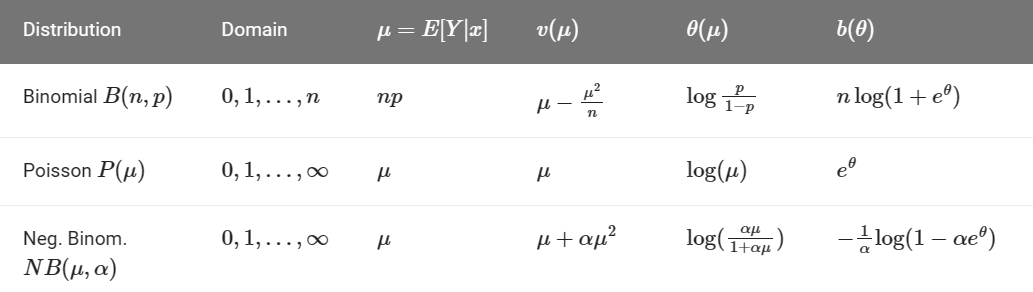

Before going into the modeling part, it's important to look at the correlation between the target and some explanatory variables:

C:\Users\deric\AppData\Local\Temp\ipykernel_10300\3887573848.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sj_train_set.corr(),ax=ax)


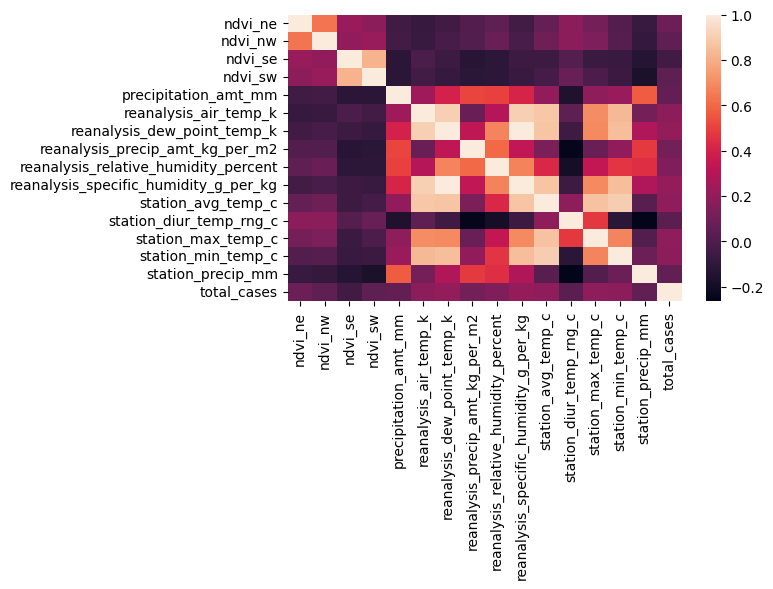

C:\Users\deric\AppData\Local\Temp\ipykernel_10300\3887573848.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sj_train_set.corr()['total_cases'].sort_values(ascending=True)


ndvi_se                                 -0.043680
station_diur_temp_rng_c                  0.035303
ndvi_sw                                  0.042670
ndvi_nw                                  0.047403
station_precip_mm                        0.051883
precipitation_amt_mm                     0.060296
ndvi_ne                                  0.085918
reanalysis_precip_amt_kg_per_m2          0.106939
reanalysis_relative_humidity_percent     0.144404
station_min_temp_c                       0.175248
reanalysis_air_temp_k                    0.180311
station_max_temp_c                       0.188447
station_avg_temp_c                       0.194823
reanalysis_dew_point_temp_k              0.202807
reanalysis_specific_humidity_g_per_kg    0.206942
total_cases                              1.000000
Name: total_cases, dtype: float64

In [10]:
sj_train_set = sj_train_set.join(sj_label_set)
iq_train_set = iq_train_set.join(iq_label_set)

fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(sj_train_set.corr(),ax=ax)
fig.tight_layout()
plt.show()
sj_train_set.corr()['total_cases'].sort_values(ascending=True)

C:\Users\deric\AppData\Local\Temp\ipykernel_10300\1148198984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iq_train_set.corr(),ax=ax)


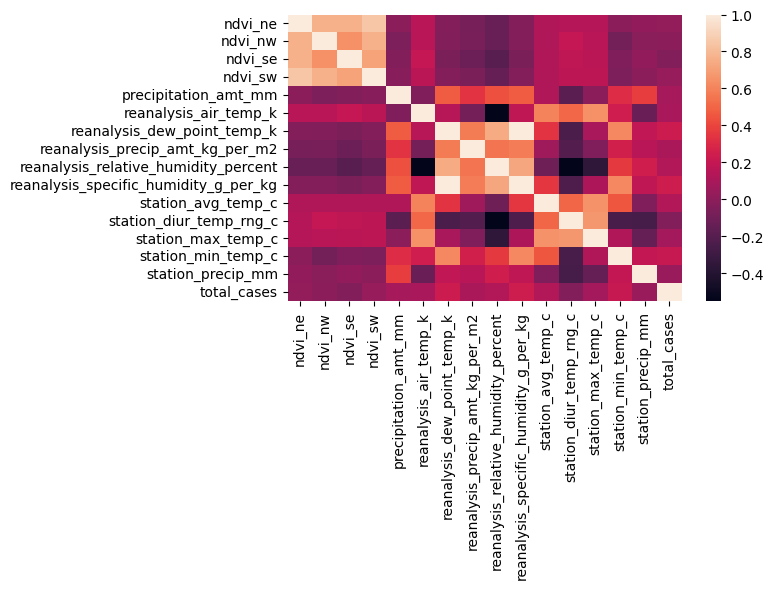

C:\Users\deric\AppData\Local\Temp\ipykernel_10300\1148198984.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iq_train_set.corr()['total_cases'].sort_values(ascending=True)


ndvi_se                                 -0.040643
station_diur_temp_rng_c                 -0.036134
ndvi_nw                                 -0.009952
ndvi_ne                                  0.020794
ndvi_sw                                  0.032812
station_precip_mm                        0.044568
station_max_temp_c                       0.076665
precipitation_amt_mm                     0.090628
reanalysis_air_temp_k                    0.096327
reanalysis_precip_amt_kg_per_m2          0.101150
reanalysis_relative_humidity_percent     0.129486
station_avg_temp_c                       0.133989
station_min_temp_c                       0.206817
reanalysis_dew_point_temp_k              0.229183
reanalysis_specific_humidity_g_per_kg    0.235218
total_cases                              1.000000
Name: total_cases, dtype: float64

In [11]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(iq_train_set.corr(),ax=ax)
fig.tight_layout()
plt.show()
iq_train_set.corr()['total_cases'].sort_values(ascending=True)

All variables are very poorly correlated to the target variable <font color=blue>total_cases</font>.

Now, splitting train and validation set:

In [12]:
#percent of validation set
val_perc = 0.2
ind = round((1-val_perc)*sj_train_set.shape[0])
sj_train_data = sj_train_set.iloc[:ind]
sj_val_data = sj_train_set.iloc[ind:]

ind = round((1-val_perc)*iq_train_set.shape[0])
iq_train_data = iq_train_set.iloc[:ind]
iq_val_data = iq_train_set.iloc[ind:]


<h3>Creating the model</h3>

To predict the <font color=blue>total_cases</font> variable, instead of using a simple linear regression model, the general linear regression model using Negative Binomial function is preffered. This model can be implemented using the statsmodels library.

In [13]:
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

def get_best_model(train, test):
    cols = train.columns.values
    model_formula = 'total_cases ~ 1'
    for i in range(1,len(cols)-1):
        model_formula += ' + ' + cols[i]

    grid = 10 ** np.arange(-10, -4, dtype=np.float64)                
    best_alpha = []
    best_score = 1000
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_data, sj_val_data)
iq_best_model = get_best_model(iq_train_data, iq_val_data)

best alpha =  1e-06
best score =  26.149732620320854
best alpha =  1e-10
best score =  7.153846153846154


Now, the target variable and the fitted values from both models can be plotted and compared.

C:\Users\deric\AppData\Local\Temp\ipykernel_10300\1059127784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train_data['fitted'] = sj_best_model.fittedvalues
C:\Users\deric\AppData\Local\Temp\ipykernel_10300\1059127784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train_data['fitted'] = iq_best_model.fittedvalues


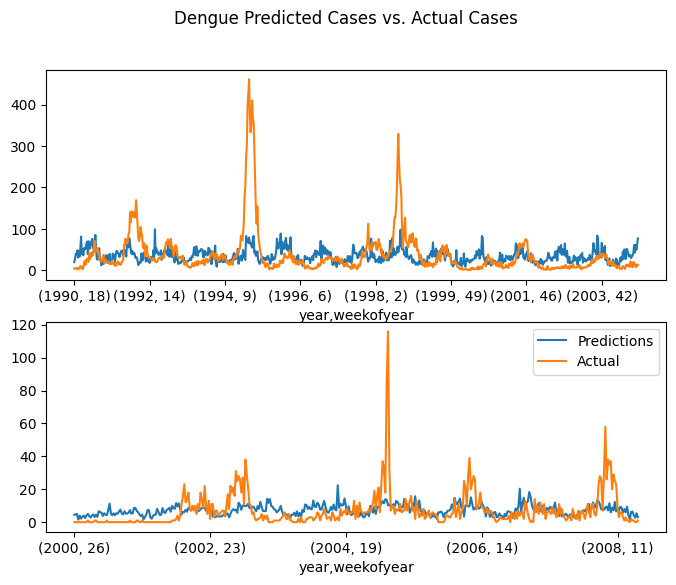

In [14]:
figs, axs = plt.subplots(2,1, figsize=(8,6))

# plot sj
sj_train_data['fitted'] = sj_best_model.fittedvalues
sj_train_data['fitted'].plot(ax=axs[0], label="Predictions")
sj_train_data['total_cases'].plot(ax=axs[0], label="Actual")

# plot iq
iq_train_data['fitted'] = iq_best_model.fittedvalues
iq_train_data['fitted'].plot(ax=axs[1], label="Predictions")
iq_train_data['total_cases'].plot(ax=axs[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

Both models capture the seasonality but have a poor performance. The predictions have some time lag compared to actual values, and the models are not able to predict the spikes of large outbreaks.

This kind of problem demands a model that are able to take in account the previous predictions, since with more people infected, more the disease can be spread by the mosquitoes.
Now, the GLM model will be replaced by GEE-Generalized Estimating Equation model that can have a covariance autoregressive structure. 

In [15]:
import statsmodels.api as sm

def get_best_model(train, test):
    cols = train.columns.values
    model_formula = 'total_cases ~ 1'
    for i in range(1,len(cols)-1):
        model_formula += ' + ' + cols[i]

    grid = 10 ** np.arange(-10, -4, dtype=np.float64)                
    best_alpha = []
    best_score = 1000
    #autoregressive component
    va = sm.cov_struct.Autoregressive()
    for alpha in grid:
        #using gee instead of glm to add autoregressive component
        model = smf.gee(formula=model_formula,groups='week_start_date',
                        data=train, cov_struct=va,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)
        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)        
    full_dataset = pd.concat([train, test])
    model = smf.gee(formula=model_formula,groups='week_start_date',
                    data=full_dataset, cov_struct=va,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_data, sj_val_data)
iq_best_model = get_best_model(iq_train_data, iq_val_data)

D:\ProgramData\Anaconda3\envs\Competicoes\lib\site-packages\statsmodels\genmod\cov_struct.py:796: FutureWarning: grid=True will become default in a future version
  warnings.warn(


best alpha =  1e-05
best score =  13.893048128342246


D:\ProgramData\Anaconda3\envs\Competicoes\lib\site-packages\statsmodels\genmod\cov_struct.py:796: FutureWarning: grid=True will become default in a future version
  warnings.warn(


best alpha =  1e-10
best score =  5.394230769230769


C:\Users\deric\AppData\Local\Temp\ipykernel_10300\1059127784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sj_train_data['fitted'] = sj_best_model.fittedvalues
C:\Users\deric\AppData\Local\Temp\ipykernel_10300\1059127784.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iq_train_data['fitted'] = iq_best_model.fittedvalues


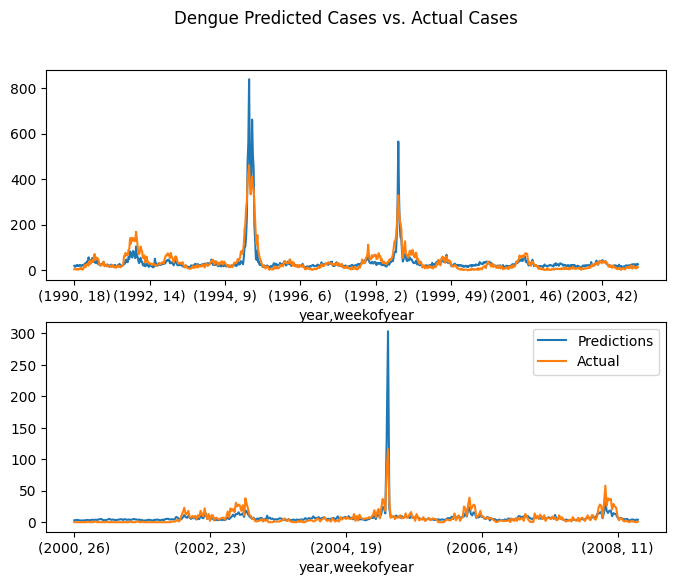

In [16]:
figs, axs = plt.subplots(2,1, figsize=(8,6))

# plot sj
sj_train_data['fitted'] = sj_best_model.fittedvalues
sj_train_data['fitted'].plot(ax=axs[0], label="Predictions")
sj_train_data['total_cases'].plot(ax=axs[0], label="Actual")

# plot iq
iq_train_data['fitted'] = iq_best_model.fittedvalues
iq_train_data['fitted'].plot(ax=axs[1], label="Predictions")
iq_train_data['total_cases'].plot(ax=axs[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

Although there still is some lag in the predictions, the spikes and the outbreaks moments are very well foreseen.The model performance and the hability to describe the disease spread have been improved for sure. 

In [17]:
sj_test, iq_test = preprocessing_function(test_set)
sj_test['total_cases'] = np.zeros(len(sj_test))
iq_test['total_cases'] = np.zeros(len(iq_test))

sj_predictions = sj_best_model.predict(exog=sj_test).astype(int)
iq_predictions = iq_best_model.predict(exog=iq_test).astype(int)

submission_format_file = os.path.join(data_path,'submission_format.csv')
submission = pd.read_csv(submission_format_file,index_col=[0, 1, 2])

submission['total_cases'] = np.concatenate([sj_predictions, iq_predictions])
submission_file = os.path.join(data_path,'submission.csv')
submission.to_csv(submission_file)
print('Submission file created!')

Submission file created!
